<a/ id='top'></a>
# Homework 4: Confidence intervals, hypothesis testing, and p-values
***

**Name**: Aaron Li

***

This assignment is due on Moodle by **5 PM on Friday 5 April**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)  

---

In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
### [20 points] Problem 1 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=8$ (location) and $\beta=2$ (scale).  Be sure to leave this cell executed before turning in your assignment! Make your histogram faces coral with gray edges.

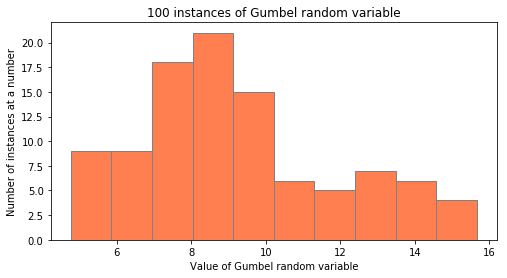

In [39]:
mu = 8
beta = 2
n_sample = 100
x = stats.gumbel_r.rvs(loc=mu,scale=beta,size=n_sampl)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4));
gum_hist=plt.hist(x,color="coral", edgecolor="gray");
plt.ylabel("Number of instances at a number");
plt.xlabel("Value of Gumbel random variable");
plt.title("100 instances of Gumbel random variable");



**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=8$ and $\beta=2$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. Note that the version of the Gumbel we are using is *right-skewed*, and is the version used to model maximal extreme events.

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 95% confidence interval for the mean.

In [40]:
Beta=2
mu=8
alpha=.05 #want 95% confidence so alpha is 5% or .05
Variance= ((np.pi**2)/6)*(Beta**2)
print(Variance)
sample_mean=np.mean(x)
print(sample_mean)
z=stats.norm.ppf(1-(alpha/2))
print(z)
true_mean=mu+(Beta*np.euler_gamma)
print(true_mean)

6.579736267392906
9.255686861530828
1.959963984540054
9.154431329803066


$\beta=2$ $\mu=8$ $n=100 

**Standard Deviation:** $\frac{\pi}{6}*(\beta)\approx 2.56509966$ 

**Sample Mean:** $\bar{x}=9.180441947600004 $

**True Mean:** $\mu +\beta*\gamma=9.154431329803066$

**Z value:** 1.959963984540054

**CI:** $\bar{x} \pm z_{\alpha/2}*\frac{\sigma}{\sqrt{n}}$ which gives CI:$[8.68,9.68]$ 

**Part C:  A theoretical interlude.** When Amy, the famous hedgehog data scientist, ran her solution code for **Part B**, she obtained a 95% confidence interval of $[8.81, 9.82]$ for the mean of the $Gum(\mu=8, \beta=2)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** If we sample 100 random variables from the $Gum(\mu=8, \beta=2)$ distribution, then roughly 95% of them will be between 8.81 and 9.82.

**95% CI:** In repeated sampling, 95% of all CI will contain the true mean while the other 5% of CI will not.

**i:** This situation is correct because what a 95% confidence interval concludes is that 95% of the time your CI will have the true mean inside of it.

**ii:** This situation is correct because a 95% confidence interval will have the true mean inside it 95% of the time so that means that in a class of 100 students 95 students should contain the true mean in their CI while 5 should not which is the correct interpretation.

**iii:** This situation is not correct because we do not take a single confidence interval and use it to catch our data points. A 95% CI is meant to show that there is a 95% chance that the true mean is in our CI, not that there is  95% of our data points land in our CI.

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  For each random sample, compute the 66% confidence interval for the mean. Note that you actually know the variance for the true population distribution, $\sigma^2$ from Part B.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals steelblue if they cover the true mean, and coral if they don't.  

Be sure to leave this cell executed before turning in your assignment!

66.0 % of the Confidence Intervals had the true mean inside


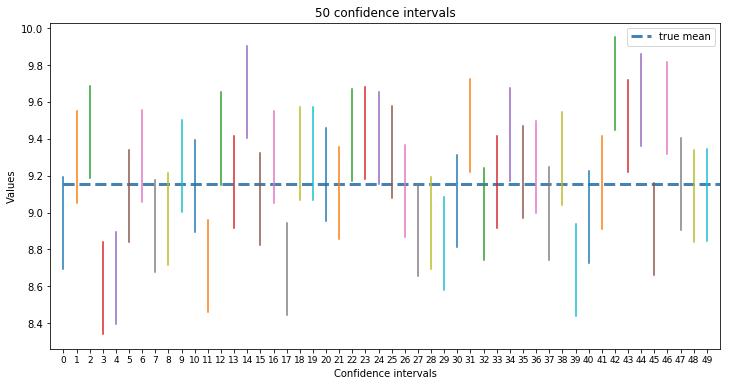

In [57]:
# GIVEN CODE:

def confidence_intervals(m=500, n=100):
    mu = 8
    beta = 2
    alpha=.33 #want 66% confidence so alpha is 33% or .33
    std= ((np.pi)/np.sqrt(6))*(beta)
    z=stats.norm.ppf(1-(alpha/2))
    sqrt_n=np.sqrt(n)
    true_mean=9.154431329803066
    mean_in_CI=0
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
    ax.plot([0,50], [true_mean, true_mean], color="steelblue", ls='--', lw=3,label="true mean")
    ax.legend()

    for i in range(50):
        rv = stats.gumbel_r.rvs(loc=mu,scale=beta,size=n)
        sample_mean=np.mean(rv)
        CI_top=sample_mean+(z*(std/sqrt_n))
        CI_bottom=sample_mean-(z*(std/sqrt_n))
        s=np.std(rv,ddof=1)
        ax.plot([i, i], [CI_bottom, CI_top])
        if true_mean <= CI_top and  true_mean >= CI_bottom:
            mean_in_CI+=1
            
        
    ax.set_xlim([-1,50])
    plt.xticks(range(50), fontsize=9)
    plt.xlabel("Confidence intervals")
    plt.ylabel("Values")
    plt.title("50 confidence intervals")
    print((mean_in_CI*100)/50, "% of the Confidence Intervals had the true mean inside")
        
    
confidence_intervals(500,100)

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

The porportion of Confidence intervals that hold the true mean should be 66% and when I calculated  that amount of CI that had the true mean inside I got 66% as shown above which agrees with the theory that a 66% CI should have the true mean around 66% of the time.

---

<a id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2 - Taco Town!!

You're an intern in the office of the City of Boulder's official Food Rater, and in order to support her in her extremely important job, you have to determine whether Taco Bell or Del Taco has the empirically better tacos. 

"Don't worry," you tell your boss. "I'll have you know I graduated top of my class from CU Boulder, and I've been involved in numerous data science operations on difficult data sets - many of which are hedgehog-related - and I have over 300 confirmed confidence intervals. I am trained in Numpy and Pandas and I'm the top data scientist in the entire campus."

"Weird flex but OK," your boss responds, and gives you the data. The data set consists of 100 diners who ate both Taco Bell and Del Taco, and rated their meal enjoyment at each. As is often the case with fast food taco establishments, each diner ate alone and each meal was followed by about 3 weeks of intense therapy, so the diners and meals may all be considered to be independent of one another. The meal enjoyment ratings are in units of *mehs*, where lower values denote more disgust and a worse meal, and higher values are better.

**Part A:** Import the data set `taco_time.csv` as a Pandas DataFrame.

Then, plot a density histogram of the data. Include both Taco Bell and Del Taco on the same set of axes. Be sure to label your axes, and make the histogram faces slightly transparent and include a legend, so we can tell the two data sets apart. Use colors for each restaurant that are representative of that restaurant's logo or branding.

Finally, formulate a hypothesis about which restaurant has the higher mean meal enjoyment.

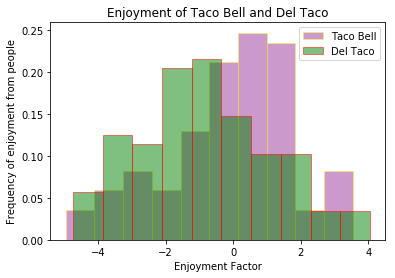

In [42]:
df = pd.read_csv("taco_time.csv")

fig, ax = plt.subplots(1,1)
ax.hist(df["Taco Bell"], color="purple", alpha=.4, density=True, Label="Taco Bell", edgecolor="yellow");
ax.hist(df["Del Taco"], color="green", alpha=.5, density=True, Label="Del Taco", edgecolor="red");
ax.legend();
ax.set_title("Enjoyment of Taco Bell and Del Taco")
ax.set_xlabel("Enjoyment Factor")
ax.set_ylabel("Frequency of enjoyment from people");

Based of the results shown above, on average more people enjoyed eating Taco Bell with a graph that has a left skew and therefore an overall higher enjoyment rate when compared to Del Taco which has a standard normal curve shape. (Bias, but this is probably because the Doritos Locos Tacos and Quesoritos at Taco Bell are straight fire)

**Part B:** Compute a 95% confidence interval for the mean enjoyment of Taco Bell meals, and a separate 95% confidence interval for the mean enjoyment of Del Taco meals. You can use Python as a calculator, but the set-up and groundwork for your computation should be in Markdown/MathJax.

Based on those confidence intervals, can we conclude that the means are different at the 95% level of confidence?

In [43]:
alpha=.05
z=stats.norm.ppf(1-(alpha/2))
Taco_Bell=df["Taco Bell"]
Del_Taco=df["Del Taco"]
n=len(Taco_Bell)
TB_mean=np.mean(Taco_Bell)
TB_std=np.std(Taco_Bell,ddof=1)
DT_mean=np.mean(Del_Taco)
DT_std=np.std(Del_Taco,ddof=1)
print(" The amount of samples are", n ,"and the z value is",z," \n","The mean for Taco bell and Del\
 Taco are",TB_mean,"and",DT_mean,"respectively.\n The stds are",TB_std,"and",DT_std, "respectively.")

 The amount of samples are 100 and the z value is 1.959963984540054  
 The mean for Taco bell and Del Taco are -0.11369182761474 and -0.8343471961220464 respectively.
 The stds are 1.8825017217657933 and 1.9096501965979529 respectively.


**CI Interval for Taco Bell:** Given $\bar{x}=-0.1137$, $\sigma=1.883$, $z=1.96$, and $n=100$

CI=$\bar{x}\pm z*\frac{\sigma}{\sqrt{n}}$

Which gives a CI for Taco bell as $[−0.483, 0.255]$

**CI Interval for Del Taco:** Given $\bar{x}=-0.8343$, $\sigma=1.91$, $z=1.96$, and $n=100$

Which gives a CI for Sel Taco as $[-1.21, −0.46]$

Because the two confidence intervals overlap between -0.46 and -0.483 we can not conclude the means are different since the mean for both Taco Bell and Del Taco could overlap in that area.

**Part C:** Compute a 95% confidence interval for the difference between the mean enjoyment of Taco Bell and Del Taco food. 

In [44]:
mean_dif=TB_mean-DT_mean
std_dif=np.sqrt((TB_std**2)/n+ (DT_std**2)/n)
CI_dif_max=mean_dif+(z*std_dif)
CI_dif_min=mean_dif-(z*std_dif)
CI_dif=[CI_dif_min,CI_dif_max]
print("The 95% confidence interval is", CI_dif)

The 95% confidence interval is [0.19508611590308955, 1.2462246211115233]


**Part D:** Comment on how the results from this two-sample confidence interval compare to the results from the separate one-sample confidence intervals. In 1-2 sentences, discuss how these results confirm, disprove, or otherwise relate to your hypothesis from Part A.

Since the CI does not contain 0 there is a significant difference and therefore, we can prove that taco bell is a better dining experience on average than Del Taco since the diffenence in the experience is always more than 0.

---
[Back to top](#top)
<a id='p3'></a>

### [20 points] Problem 3 - Evaluating Vehicle Performance 

A [1983 study](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.34.6358&rep=rep1&type=pdf) evaluated the gas mileage of a variety of cars manufactured between 1970 and 1983. The study also compiled other interesting attributes for each vehicle, but we will focus on the number of cylinders in the engine for this problem. More information on the data is available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/). Gas mileage is measured in miles-per-gallon, or mpg.

**Part A:** Read the data set and store as a Pandas DataFrame. You will need figure out what additional arguments to `pd.read_csv()` must be provided in order to read the data set properly, based on what represents a separation between two columns of data.

Then, be sure to give all of the columns informative names, if they do not already have some.

Finally, use `drop_na()` to drop any rows with missing values. Missing values are reported with a "?".

In [45]:
dfMPG = pd.read_csv('auto-mpg.data', header=None, delim_whitespace=True) # TODO - need extra arguments to read correctly

dfMPG.columns=['mpg','cylinders', 'displacement','horsepower', 'weight', 'acceleration',
              'model year', 'origin', 'car name']
dfMPG_clean=dfMPG[~dfMPG['horsepower'].isin(['?'])]



**Part B**: Assuming the data in this sample are representative of cars from the 1970-1983 time period, find a 90% confidence interval for the mean gas mileage (mpg) of all vehicles from this period. Can we conclude that the mean gas mileage is higher than 20 mpg? Be sure to show all calculations in Python. 

In [46]:
alpha=.1
z=stats.norm.ppf(1-(alpha/2))
mpg=dfMPG_clean['mpg']
mpg_sample_mean=np.mean(mpg)
mpg_std=np.std(mpg,ddof=1)
samples=len(mpg)

CI_min=mpg_sample_mean-(z*(mpg_std/np.sqrt(samples)))
CI_max=mpg_sample_mean+(z*(mpg_std/np.sqrt(samples)))
CI=[CI_min,CI_max]
print("The confidence interval is", CI)

The confidence interval is [22.79749665720537, 24.094340077488503]


Since the confidence interval minimum is 22.79749665720537 add because the true mean will be within the confidence interval 90% of the time we can say with 90% confidence that the average gas mileage is above 20. In fact, we can make the value of alpha to .000000001 and still have the minimum gas mileage of around 21, meaning at this point there is a 99.9999999% chance that the mean is above 20 therfore it is highly likely that the mean gas miliage is higher than 20.

**Part C**: You are considering buying a new car, but since [gas prices have recently increased dramatically](https://www.energy.gov/eere/vehicles/fact-915-march-7-2016-average-historical-annual-gasoline-pump-price-1929-2015), you are concerned about getting good fuel economy.

Using an appropriate *hypothesis test*, can you conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines? You may consider two populations here: those vehicles with 4 or 6 cylinders, and those vehicles with 8 cylinders in their engines. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

In [47]:
def ptest():
    alpha=.01
    c=10
    p_value=stats.norm.ppf(alpha)
    four_six_cylinder=dfMPG_clean[dfMPG_clean['cylinders']!=8]
    four_six_cylinder=four_six_cylinder['mpg'];
    eight_cylinder=dfMPG_clean[dfMPG_clean['cylinders'].isin([8])];
    eight_cylinder=eight_cylinder['mpg'];
    #print(eight_cylinder)
    
    #find the means for each value and add 10 to 8 cylinder   
    mu_1=np.mean(four_six_cylinder)
    mu_2=np.mean(eight_cylinder)
    #find the standard devation for 4 and 6
    var_1=np.var(four_six_cylinder,ddof=1)
    var_2=np.var(eight_cylinder,ddof=1)
    #find the number of samples for 4 and 6
    n_1=len(four_six_cylinder)
    n_2=len(eight_cylinder)
    
    z=((mu_1-mu_2)-c)/np.sqrt((var_1/n_1)+(var_2/n_2))
    print(z)
    print(mu_1-10,mu_2)
    p_value=1-stats.norm.cdf(z)
    print(p_value)
    
ptest()

3.115911010850845
16.469204152249137 14.963106796116506
0.0009168880091253717


In order to find whether or not a 4 or 6 cylinder engine is more than 10 mpg better we need to develop a hypothesis test. The hypothesis test will be as follows $$H_0: \mu_{1}=\mu_{8 cylinder}+10$$ $$H_1: \mu_{1}>\mu_{8 cylinder}+10$$. Where $\mu_{1}$ is a four and 6 cylinder cars. What this means is that our null hypothesis is that our 4 and 6 cylinder cars do not have better mpg by 10 compared to 8 cylinders. The Alternative hypothesis is that our 4 or 6 cylinder cars on average have a better mpg by 10 compared to the 8 cylinders.

To find the p-value of we will use the equation $1- stats.norm.cdf(z)$ since we want to show $\theta>\theta_0$ we find z using the 2 sample testing. with the equation $$z=\frac{(\bar{x_1}-\bar{x_2}-c)}{\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}}$$ where c=10. When we calculate all of the numbers we find that $p=.00091$

Since p < .01 we can't reject the null hypothesis and we can't say that the 4 and 6 cylinder cars on average is 10 mpg better than 8 cylinders.


---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4 - Grab bag!



<img src="http://blog.localditch.com/wp-content/uploads/2011/01/sonic4.jpg" style="width: 400px;"/>

**Part A**: You work for an engineering firm that has been hired to construct a corkscrew-shaped looped path for hedgehogs to run on and collect gold rings. Thousands of hedgehogs will run along this path each day, so structural failure means injury or death for many wonderful little creatures. 

You are in charge of quality control for the average strength of carbon fiber that will be used to construct the corkscrew path. Thinking back fondly to your days in CSCI 3022, you set up a hypothesis test in which your alternative hypothesis is that the strength of the carbon fiber is below tolerance, and therefore unsafe. What is the null hypothesis? Would you rather have a low Type I error rate or a low Type II error rate? Explain.

The null hypothesis is that the strength of the carbon fiber is equal to the tolerance. In a situation where hedgehogs could be injured we would want a lower type II error rate. A type II error rate means the bridge thought to be safe when it is in fact it is unsafe. Therefore, we want to keep type Ii errors at a minimum to ensure the hedgehog safety. 

**Part B**: Amy, the famous hedgehog data scientist, is working for the same engineering firm as you. She is a legend around the office! Word around the water cooler is that out of all of the 95% confidence intervals that Amy has constructed, 931 of them have turned out to actually capture the true population mean. Since Amy is a data science wizard and you can be sure she is constructing her confidence intervals correctly and collecting and using her data honestly, about how many 95% confidence intervals would you expect her to have constructed total? Explain your reasoning fully with words as well as some math.

We want 95% confidence interval so if there are 931 CI that capture the CI need to find the total amount of CI to use by dividing 931 by .95 $$total=\frac{931}{.95}=981$$ so Amy would need a total of 981 confidence intervals in order to have 931, 95%, capture the true mean. 

**Part C**: As part of an outreach program, you and Amy are visiting a local elementary school to talk to the students about data science. What a riot! One of the more astute students asks you a question: "In general, which is wider: a 95% confidence interval or a 99% confidence interval?"

How would you explain this to these young students, who are not fluent in any kind of science? (So, for example, spouting off theory and words like "mean" and "z critical value" probably won't mean anything to them.)

Amy would reply:"A 99% confidence interval is generally wider. For example, pretend you are a fishing with a net and you want to catch a red snapper in a sea full of seabass. To be more confident that you catch your fish, you cast a bigger net, in the same way, to be more confident to catch the special number you want, you want a wider interval to catch your special number. And that kids, is why a 99% confidence interval would be wider than a 95% confidence interval since you wanna be more confident you get your special number you make the interval wider!"

**Part D:** You observe a sample of 73 pygmy hedgehogs and find that 49 of them are fantastic pets. Then, you observe a sample of 58 long-eared hedgehogs and find that 51 of them are fantastic pets.

Is there statistical evidence at the 0.05 significance level that the true proportion of long-eared hedgehogs that make fantastic pets is 10% higher than the true proportion of pygmy hedgehogs that make fantastic pets? Perform a test that computes and properly interprets a p-value.

Null hypothesis (H_0): Long-eared eared hedgehogs make fantastic pets is 10 percent higher than pygmy hedgehog. $p_1-p_2=.1$

Alternative hypothesis (H_1): Long-eared eared hedgehogs make fantastic pets is more than 10 percent higher than pygmy hedgehog. $p_1-p_2>.1$

To find the p-value we will use a 2 sample test:
$$z=\frac{(p_1-p_2-c)}{\sqrt{\frac{\hat{p}_1}{n_1}+\frac{\hat{p}_2}{n_2}}}$$ 

Where $\hat{p}=\frac{p(1-p)}{n}$ and c=.1

To find the p-value of we will use the equation $1- stats.norm.cdf(z)$ since we want to show $\theta>\theta_0$
We want to prove our p_value>.05

In [48]:
p_long=51/58
p_pygmy=49/73
c=.1
var_long=(p_long*(1-p_long))/58
var_pygmy=(p_pygmy*(1-p_pygmy))/73

z=(p_long-c-p_pygmy)/(np.sqrt(var_long+var_pygmy))
p_value=1-stats.norm.cdf(z)
print(p_value)

0.060394950555197724


Since our p-value>.05 then we reject the null hypothesis.

**Part E**: Let $X$ be a normally-distributed random variable representing the difficulty of a homework problem in CSCI 3022. You draw from it more times than you care to count during the Spring 2019 semester and get the following values, stored in the numpy array **toughness**, below. Compute a 90% confidence interval for the _standard deviation_ in problem toughness.

In [49]:
toughness = np.array([7.7778,6.9459,5.8248,9.1111,6.0180,5.0898,7.0380,8.9273,2.9614,5.8387,6.0231])

X is a normally-distributed variable therefore we do not have to use CLT in order to compute the std.
Instead we will use the following equation: $$Z=\frac{x-\mu}{\sigma}$$ 
so the we find $$P(z\leq\frac{x-\mu}{\sigma}\leq z)->P(z\sigma^2\leq(x-\mu)\sigma\leq z\sigma^2)->
P(\frac{z\sigma^2}{x-\mu}\leq\sigma\leq\frac{z\sigma^2}{x-\mu})$$

Where x is the smallest and largest value

In [50]:
alpha=.1
z=stats.norm.ppf(1-alpha/2)
mean=np.mean(toughness)
var=np.var(toughness)
tough_min=np.min(toughness)
tough_max=np.max(toughness)

CI_min=z*var/(tough_min-mean)
CI_max=z*var/(tough_max-mean)
CI=[CI_min, CI_max]
print("The 90% confidence interval for the standard deviation of toughness is", CI)

The 90% confidence interval for the standard deviation of toughness is [-1.2951774398137827, 1.761191374952424]


---

<a id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5 - Lies, damned lies, and statistics

![frazz](http://3.bp.blogspot.com/-SbQUWRfHFXk/VdN8YWAy0WI/AAAAAAAAJLw/Ij5E0CbYk6g/s1600/lies3.gif)

Legend of your Data Science prowess has spread o'er the land. You have been contacted by a shadowy organization to assess whether there is statistical evidence for sea-level rise in the area of Key West, Florida. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file included in the zip folder for this assignment. The columns are, in order, the year, month, day-of-month and measured sea level (in millimeters).

**Part A:** Load the data `sealevel_keywest.csv` into a Pandas DataFrame. Rename the columns as something meaningful in the context of this problem. Print to the screen the first 7 rows from your updated DataFrame.

In [51]:
sea_level = pd.read_csv('sealevel_keywest.csv', header=None,)
sea_level.columns=['Year', 'Month', 'Day', 'Height (mm)']
sea_level.head(7)

,Year,Month,Day,Height (mm)
0,1913,1,20,1453
1,1913,1,21,1439
2,1913,1,22,1444
3,1913,1,23,1489
4,1913,1,24,1474
5,1913,1,25,1442
6,1913,1,26,1467


**Part B:**  Plot the raw time series of sea levels. Be sure to label your axes, including units. For the $x$-axis, place the $x$ tick marks on January 2 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

In [52]:
print(np.mod(1920,10))
print(len(sea_level))

0
37967


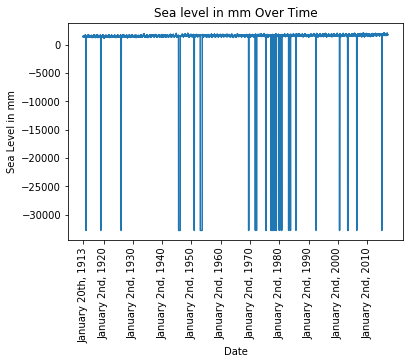

In [53]:
x_axis=['January 20th, 1913']
x_tick=[0]
Max_year=np.max(sea_level['Year'])
heights=sea_level['Height (mm)']
label='January 2nd, '
for i in range(len(sea_level)):
    if np.mod(sea_level['Year'][i],10)==0 and sea_level['Month'][i]==1 and sea_level['Day'][i]==2:
        x_tick.append(i)
        year_string=str(sea_level['Year'][i])
        x_axis.append(label+year_string)
plt.plot(heights)
plt.xticks(x_tick,x_axis, rotation='vertical');
plt.xlabel("Date")
plt.ylabel("Sea Level in mm")
plt.title("Sea level in mm Over Time");

**Part C:** Your time series plot from Part B should look pretty funky. Namely, there are a bunch of spikes in it! What do you think these spikes represent?

Now, clean your data set by doing the following:
* Remove any data points associated with these spikes. You may need to look back to some of the earlier in-class notebooks and Pandas tutorials for how to drop data points from a Pandas DataFrame. 
* Include only the data point from the second day of each month.
* Convert the sea-level data from millimeters to feet.

Then, make a similar plot to Part B, but of your cleaned data set. Be sure to label axes (including units) and only label January 2 of each year that is divisible by 10.

**The drastic drops in sea level are likely caused by error in the data whether it is a mechanical error such as device reading the sea level is broken.**

1217
[0, 82, 201, 321, 434, 545, 664, 781, 897, 1017, 1134]


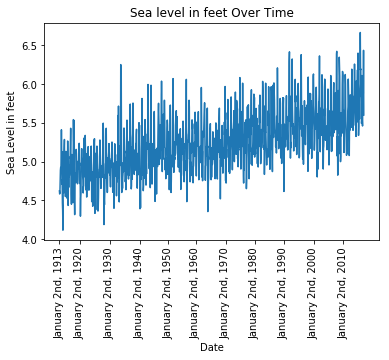

In [54]:

sea_level_clean=sea_level[sea_level['Height (mm)']>=0]
sea_level_clean=sea_level_clean[sea_level_clean['Day']==2]
sea_level_clean.loc[:,'Height (mm)'] *= 1/304.8
sea_level_clean=sea_level_clean.rename(columns = {'Height (mm)':'Height (feet)'})
sea_level_clean=sea_level_clean.reset_index(drop=True)
x_axis=['January 2nd, 1913']
x_tick=[0]
Max_year=np.max(sea_level_clean['Year'])
heights=sea_level_clean['Height (feet)']
label='January 2nd, '
print(len(sea_level_clean))
for j in range(len(sea_level_clean)):
    if np.mod(sea_level_clean['Year'][j],10)==0 and sea_level_clean['Month'][j]==1 and sea_level_clean['Day'][j]==2:
        x_tick.append(j)
        year_string=str(sea_level_clean['Year'][j])
        x_axis.append(label+year_string)
print(x_tick)
plt.plot(heights)
plt.xticks(x_tick,x_axis, rotation='vertical');
plt.xlabel("Date")
plt.ylabel("Sea Level in feet")
plt.title("Sea level in feet Over Time");



**Part D:** Your mysterious employer owns a lot of beachfront property in Key West and does not want to see people shy away from buying real estate and spending time near the sea. So, they really want to convince others to that the mean sea level in Key West in not increasing. Toward this end, your employer wants to find a decade of data (11 years, including both end points) that has a mean sea level which is not statistically significantly different from the mean sea level in the decade 2000-2010 (including data from both 2000 and 2010). Your employer wants you to use the 99% confidence/1% significance level because it sounds catchy in a press release, and wants the *earliest* decade possible.

Use your cleaned monthly data set from Part C to find the earliest decade for which you cannot conclude the mean sea level at Key West was statistically significantly different from the mean sea level in the 2000-2010 decade. You may want to write a helper function to compute the confidence intervals/perform the hypothesis test for you, because there are a LOT of possible 11-year periods to try.

You may use either hypothesis tests or confidence intervals, but clearly state which method you will use, your results and show all work that leads to your conclusion. 

In [55]:
def earliest_dec():
    alpha=.01
    z=stats.norm.ppf(1-alpha/2)
    sea_level_dec_2000=sea_level_clean[(sea_level_clean['Year']>=2000) & (sea_level_clean['Year']<=2010)]
    sea_2000_height=sea_level_dec_2000['Height (feet)']
    sea_2000_mean=np.mean(sea_2000_height)
    sea_2000_var=np.var(sea_2000_height)
    sea_2000_len=len(sea_2000_height)
    min_year=np.min(sea_level_clean['Year'])
    max_year=np.max(sea_level_clean['Year'])


    for i in range(min_year, max_year):
        #start at 1913 and check range from 1913 to 1923 if fails go to 1914 to 1924
        sea_level_dec_myst=sea_level_clean[(sea_level_clean['Year']>=i) & (sea_level_clean['Year']<=i+10)]
        sea_myst_height=sea_level_dec_myst['Height (feet)']
        sea_myst_mean=np.mean(sea_myst_height)
        sea_myst_var=np.var(sea_myst_height)
        sea_myst_len=len(sea_myst_height)
        mean_dif=sea_2000_mean-sea_myst_mean
        std_dif=np.sqrt((sea_2000_var)/sea_2000_len+ (sea_myst_var)/sea_myst_len)
        CI_dif_max=mean_dif+(z*std_dif)
        CI_dif_min=mean_dif-(z*std_dif)
        if CI_dif_min<=0 and CI_dif_max>=0:
            return [i,i+10]
years=earliest_dec();
print("With 99% confidence, the sea levels have not risen since the decade of", str(years[0]) +'-'+str(years[1])+'!')

With 99% confidence, the sea levels have not risen since the decade of 1984-1994!


**Method**
To solve this problem we will use the 2 sample confidence interval for the difference.
$$\bar{x}-\bar{y} \pm z_{\frac{\alpha}{2}}*\sqrt{\frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2}}$$

Where $\bar{x}$ equal to the mean for the decade of 2000-2010 $\bar{y}$ is mean for decade intervals we are testing. Likewise, the $\sigma_1$ and $n_1$ is the standard deviation and sample size for decade of 2000-2010, likewise $\sigma_2$ and $n_2$ are standard deviations and sample size of decade intervals we are testing.

By taking the confidence interval for the difference between average sea levels we can begin to say there may by no statiscally significant difference once 0 is in our confidence interval because 0 could be the differnece in our average sea levels in our decades and therefore we do not enough evidence to rule it a difference of 0 in our 99% confidence interval.

In order to find this quickly. I used a for loop that will loop through all 11 year intervals until there is an interval where CI minimum is less than or equal to 0 and CI maximum is greater than or equal to 0 because this guareentees that 0 will be within our 2 sample difference confidence interval.
